In [6]:
import numpy as np
import shutil
from astropy.io import ascii, fits
import pyregion
import aplpy
from ants import headPlay
from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm

get_ipython().magic(u'pylab inline')


rootDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/'
#Inputs
#cubeName = cubeDir+'M64_FA_UF-2deg_r0.5_HI.image.fits'
contDir = '/Users/maccagni/Projects/MFS/FornaxA/contData/inIms/'
#contName = contDir+'M64_FA_UF-meq_2-MFS-image.fits'
contName = contDir+'Meer_1440MHz.fits'
#contNameHighRes = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/M64_FA_UF_2-MFS-image.fits'
opticalName = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/FornaxA_r_mosaic_pixCut.fits'
momName = rootDir+'paolo_r0p5_HI.imagepbcorr_mom0_nostokes.fits'

FA_radeg = 50.673825
FA_decdeg = -37.206227
BeamRa = 50.694035
BeamDec = -37.222974

sysVel = 1760.

#Outputs
plotDir = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/overlays/'


opticalName_a = '/Users/maccagni/Projects/MFS/FornaxA/centreHI/FornaxA_r_mosaic_pixCut_plot.fits'
momName_a = rootDir+'mom0plot.fits'

fint = headPlay.headplay()
fint.rootdir = rootDir

#a=imDir+'meer_an.fits'
#b=imDir+'meer_an_plot.fits'

heads,datas = fint.cleanHead(opticalName,writeFile=False)
fits.writeto(opticalName_a,datas,heads,overwrite=True)

heads,datas = fint.cleanHead(momName,writeFile=False)
fits.writeto(momName_a,datas,heads,overwrite=True)

print '''\t+---------+\n\t Inputs loaded\n\t+---------+'''

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
	+---------+
	 Inputs loaded
	+---------+
	+---------+
	 Inputs loaded
	+---------+


NORMAL TERMINATION
NORMAL TERMINATION


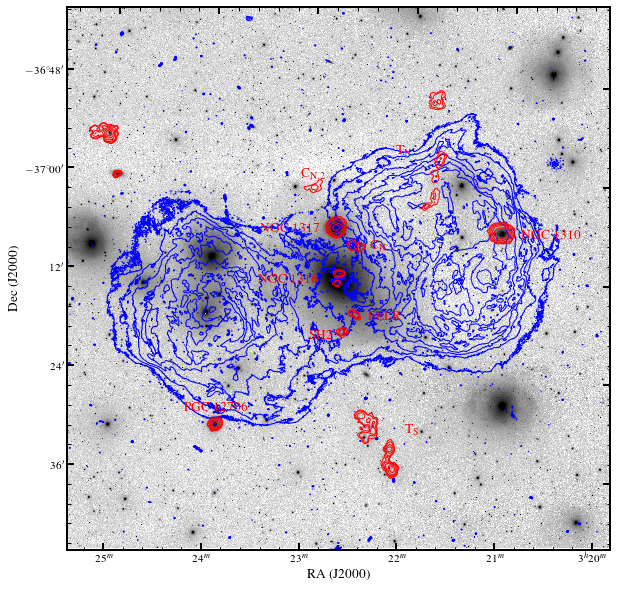

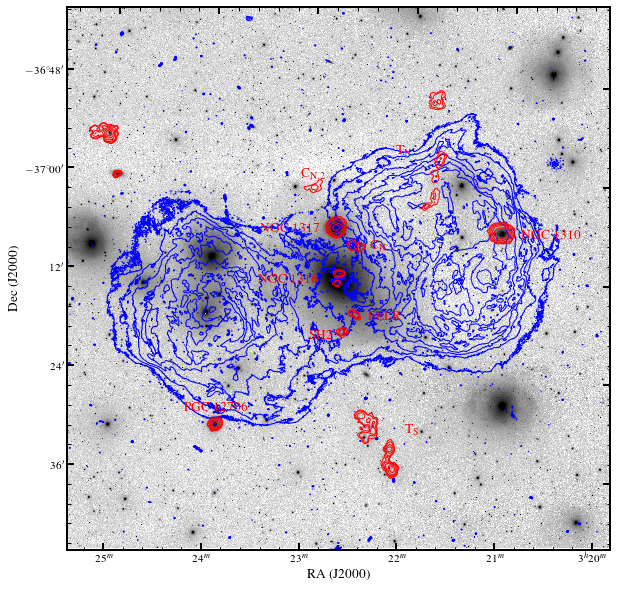

In [11]:
params = {'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 13.5,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 1,
          'xtick.labelsize'     : 12,
          'ytick.labelsize'     : 12, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)



fits.setval(opticalName_a,'BMAJ',value=0.0102)
fits.setval(opticalName_a,'BMIN',value=0.0078)
fits.setval(opticalName_a,'BPA',value=109)


#plot image
#a=imDir+'Meer_1030MHz.fits'

fig = plt.figure(figsize=(10, 10))

f1 = aplpy.FITSFigure(opticalName_a, figure=fig)
f1.set_theme('publication')
f1.frame.set_linewidth(2)
f1.recenter(FA_radeg,FA_decdeg,height=1.1,width=1.1)
#f1.show_colorscale(aspect='equal', cmap='Greys',vmin=-1.5e-11,vmax=1.3e-10)
f1.show_grayscale(vmin=-2e-12, vmax=2e-10, vmid=-4e-12, stretch='log')

f1.axis_labels.set_font( weight='book',size='medium', 
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')
f1.axis_labels.set_xtext('RA (J2000)')
f1.axis_labels.set_ytext('Dec (J2000)')
f1.tick_labels.set_xformat('hh:mm')
f1.tick_labels.set_yformat('dd:mm')
f1.tick_labels.set_font( weight='book', size='small',
                         stretch='normal', family='serif', 
                         style='normal', variant='normal')

f1.show_contour(contName,levels=[1e-4,3e-4,6e-4,1e-3,1.5e-3,2e-3,3e-3,4e-3,8e3,1e-2,1e-1], colors='blue')
f1.show_contour(momName_a,levels=0.025*2**np.arange(10),colors='r')

f1.add_label(50.215,-37.102,'NGC 1310'        ,color='red',horizontalalignment='left'  ,verticalalignment='center')
f1.add_label(50.730,-37.105,'NGC 1317'        ,color='red',horizontalalignment='right' ,verticalalignment='center')
f1.add_label(50.730,-37.208,'NGC 1316'        ,color='red',horizontalalignment='right' ,verticalalignment='center')
f1.add_label(50.595,-37.279,'EELR'            ,color='red',horizontalalignment='left'  ,verticalalignment='center')
f1.add_label(50.684,-37.320,'SH2'             ,color='red',horizontalalignment='right' ,verticalalignment='center')
f1.add_label(50.976,-37.474,'PGC 12706'       ,color='red',horizontalalignment='center',verticalalignment='center')
f1.add_label(50.596,-37.139,'C$_\mathrm{N,1}$',color='red',horizontalalignment='left'  ,verticalalignment='center')
f1.add_label(50.749,-36.997,'C$_\mathrm{N,2}$',color='red',horizontalalignment='center',verticalalignment='center')
f1.add_label(50.490,-37.508,'T$_\mathrm{S}$'  ,color='red',horizontalalignment='left'  ,verticalalignment='center')
f1.add_label(50.540,-36.945,'T$_\mathrm{N}$'  ,color='red',horizontalalignment='left'  ,verticalalignment='center')


fig.savefig(plotDir+'OptContMom0.pdf',format='pdf',
            dpi=300,transparent=False,bbox_inches='tight',overwrite=True)
print 'NORMAL TERMINATION'